In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import open3d as o3d
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import chardet

In [11]:
data = np.loadtxt('Cloud.pts')

# 取Z軸數據
z_values = data[:, 2]
z_values = list(set(z_values))
z_values = sorted(z_values)
z_min = int(np.min(z_values))
z_max = int(np.max(z_values))

# 選出各Z軸平面的中心點
center_points = []
for z in range(z_min, z_max + 1):
    rows = []
    # 依照Z軸平面分群
    for i in range(len(data)):
        if int(data[i, 2]) == z: rows.append(i)    
    if(len(rows) == 0): continue  
    points = data[rows]
    points = np.array(points)
    # 分群後找出中心點
    x = points[:, 0]
    y = points[:, 1]
    min_x = np.min(x)
    max_x = np.max(x)
    min_y = np.min(y)
    max_y = np.max(y)
    center_x = (min_x + max_x) / 2.0
    center_y = (min_y + max_y) / 2.0
    center = [center_x, center_y, z]
    center_points.append(center)
    # 將已分群之資料刪除
    mask = np.ones(len(data), dtype=bool)
    mask[rows] = False
    data = data[mask]

# 將center_points寫成pts
np.savetxt('center.pts', center_points, delimiter=' ')


In [12]:
data = np.loadtxt('center.pts')
points = data[rows]

線性迴歸

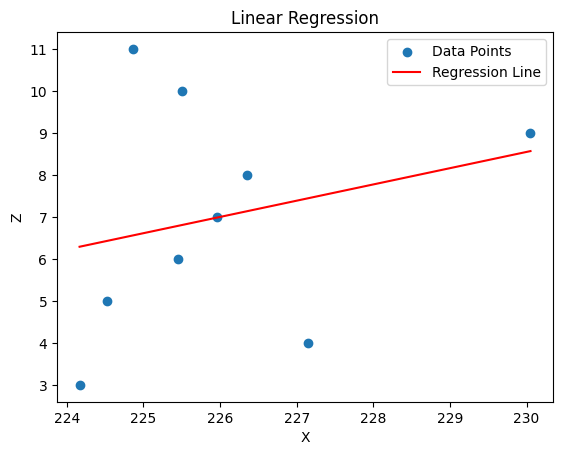

In [44]:
X = points[:, 0]
Z = points[:, 2]

Xm = np.mean(X)
Zm = np.mean(Z)

dx = X - Xm
dz = Z - Zm

# 計算斜率
m = np.sum(dx * dz) / np.sum(dx**2)

# 計算截距
b = Zm - m * Xm

# 迴歸線的X 
x_range = np.linspace(np.min(X), np.max(X), 100)

# 迴歸線對應的Y
z_range = m * x_range + b

# 繪製點雲資料集和迴歸線
plt.scatter(X, Z, label='Data Points')
plt.plot(x_range, z_range, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Linear Regression')
plt.legend()
plt.show()

 
0.387 x - 80.47


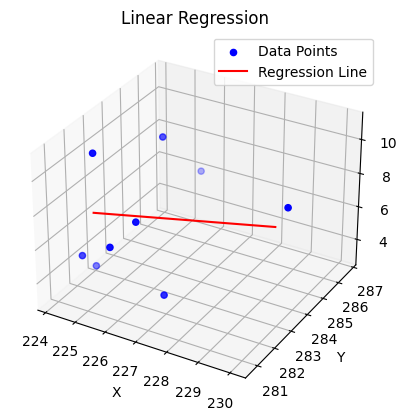

In [72]:
X = points[:, 0]
Y = points[:, 1]
Z = points[:, 2]

# 进行线性回归
coefficients = np.polyfit(X, Z, 1)

# 建立线性方程式
linear_function = np.poly1d(coefficients)
print(linear_function)

# 在 X 范围内生成连续的数值以绘制回归线
x_range = np.linspace(np.min(X), np.max(X))
z_range = linear_function(x_range)

# 绘制原始数据和回归线
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c='blue', label='Data Points')
ax.plot(x_range, np.ones_like(x_range) * np.mean(Y), z_range, color='red', label='Regression Line')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Linear Regression')
ax.legend()
plt.show()


多項式迴歸

        3         2
0.2272 x - 154.6 x + 3.507e+04 x - 2.651e+06


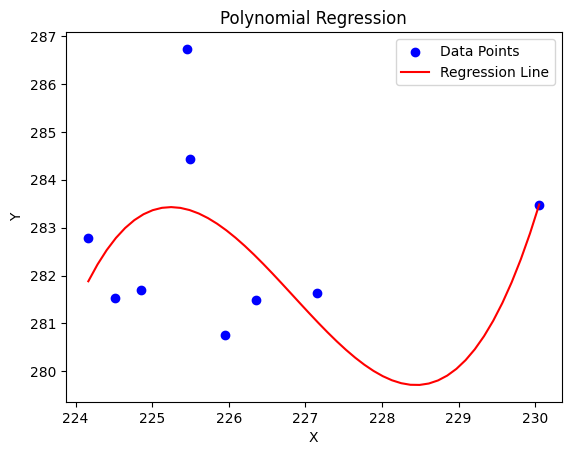

In [47]:
X = points[:, 0]
Y = points[:, 1]
Z = points[:, 2]

degree = 3

coefficients = np.polyfit(X, Y, degree)

poly_function = np.poly1d(coefficients)
print(poly_function)

x_range = np.linspace(np.min(X), np.max(X))
y_range = poly_function(x_range)

plt.scatter(X, Y, c='blue', label='Data Points')
plt.plot(x_range, y_range, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

        3         2
0.5825 x - 396.6 x + 9.002e+04 x - 6.81e+06


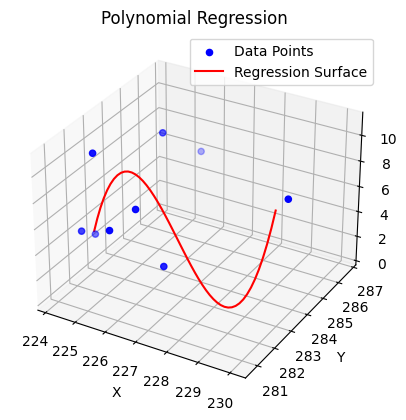

In [48]:
X = points[:, 0]
Y = points[:, 1]
Z = points[:, 2]

# 選擇多項式的次數
degree = 3

# 進行多項式迴歸
coefficients = np.polyfit(X, Z, degree)

# 建立多項式方程式
poly_function = np.poly1d(coefficients)
print(poly_function)

# 在 X 範圍內生成連續的數值以繪製迴歸線
x_range = np.linspace(np.min(X), np.max(X))
z_range = poly_function(x_range)

# 繪製原始資料和迴歸線
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c='blue', label='Data Points')
ax.plot(x_range, np.ones_like(x_range) * np.mean(Y), z_range, color='red', label='Regression Surface')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Polynomial Regression')
ax.legend()
plt.show()

樹狀迴歸

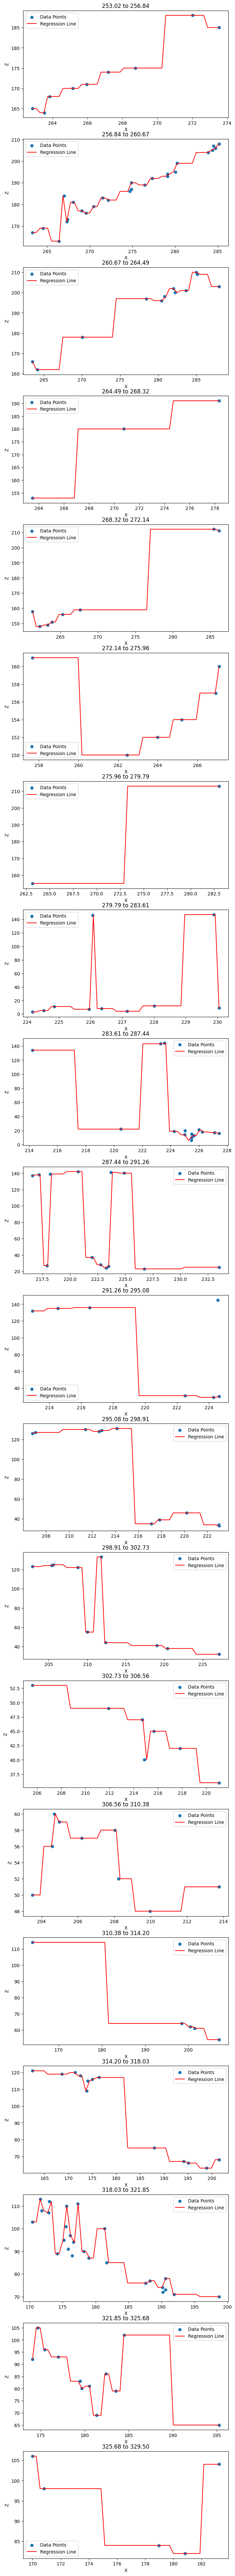

In [49]:
points = data[:, :3]
X = points[:, 0]
Y = points[:, 1]
Z = points[:, 2]

y_min = np.min(Y)
y_max = np.max(Y)
num_segments = 20
y_segments = np.linspace(y_min, y_max, num_segments + 1)

model = DecisionTreeRegressor()

fig, axes = plt.subplots(num_segments, 1, figsize=(8, 5 * num_segments))

for i in range(num_segments):
    mask = (Y >= y_segments[i]) & (Y < y_segments[i+1])
    x_values = X[mask]
    z_values = Z[mask]

    ax = axes[i] if num_segments > 1 else axes
    ax.scatter(x_values, z_values, label='Data Points')
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_title(f'{y_segments[i]:.2f} to {y_segments[i+1]:.2f}')
    ax.legend()

    model.fit(x_values.reshape(-1, 1), z_values)
    x_range = np.linspace(np.min(x_values), np.max(x_values))
    z_range = model.predict(x_range.reshape(-1, 1))
    ax.plot(x_range, z_range, color='red', label='Regression Line')
    ax.legend()

    point_cloud = np.column_stack((x_values, y_segments[i] * np.ones_like(x_values), z_values))
    line_cloud = np.column_stack((x_range, y_segments[i] * np.ones_like(x_range), z_range))

    pcd_points = o3d.geometry.PointCloud()
    pcd_points.points = o3d.utility.Vector3dVector(point_cloud)

    pcd_line = o3d.geometry.PointCloud()
    pcd_line.points = o3d.utility.Vector3dVector(line_cloud)

    o3d.io.write_point_cloud(f'output_line_{i}.ply', pcd_line)

Z = 1.88 * X + -329.15
Z = 3.12 * X + -671.91
Z = -6.12 * X + 1421.68
Z = -1.41 * X + 358.99
Z = -1.67 * X + 392.51


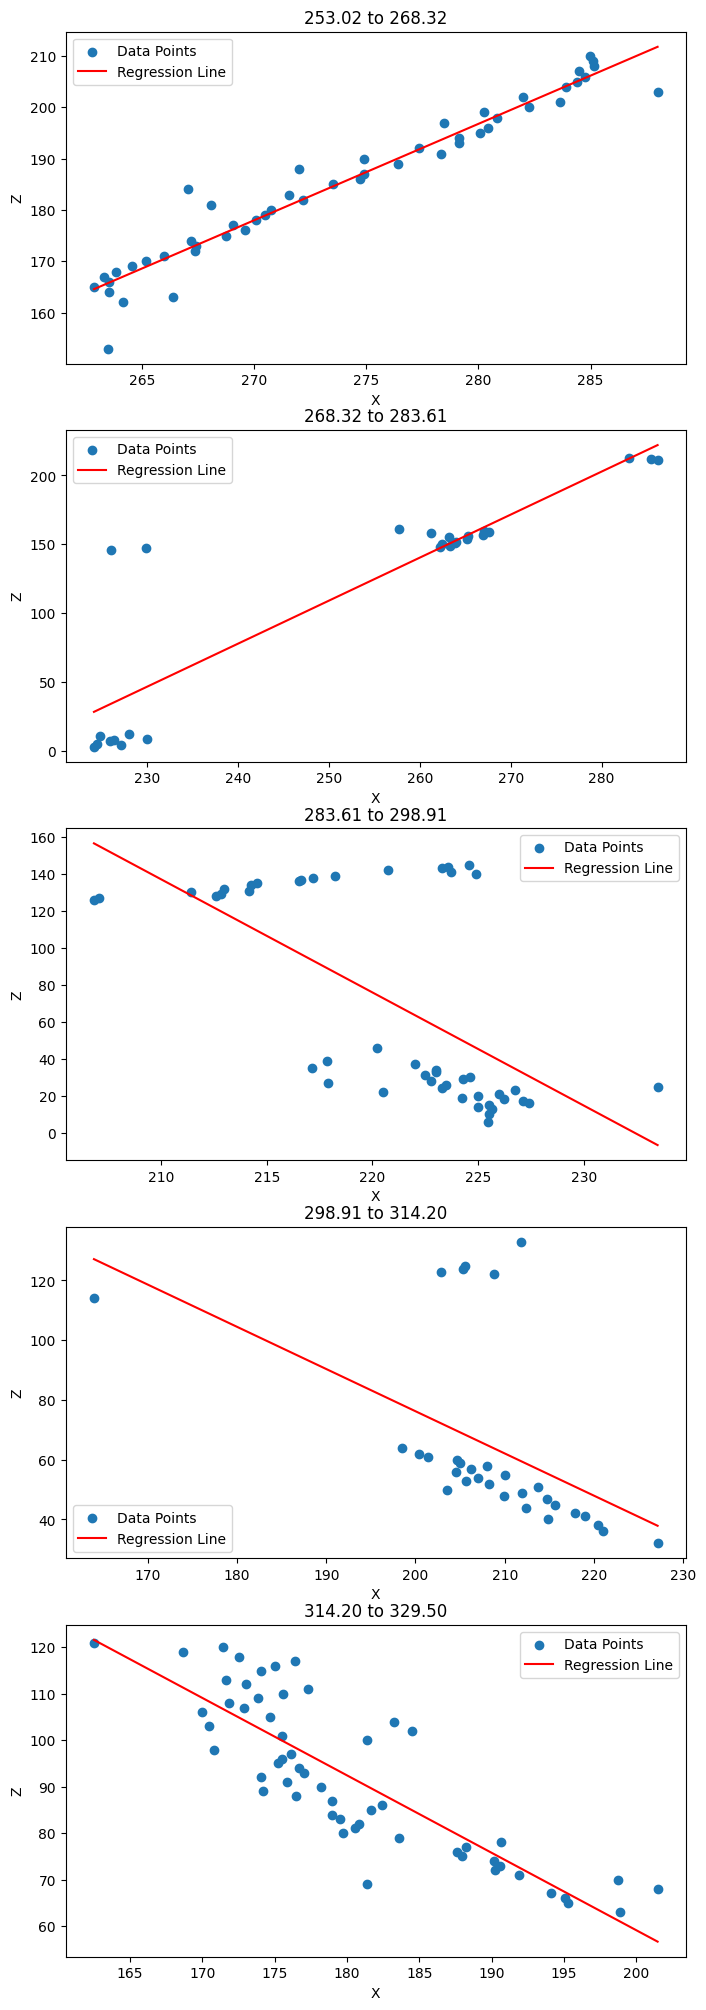

In [60]:
# 提取XYZ坐标
points = data[:, :3]
X = points[:, 0]
Y = points[:, 1]
Z = points[:, 2]

y_min = np.min(Y)
y_max = np.max(Y)
num_segments = 5 
y_segments = np.linspace(y_min, y_max, num_segments + 1)

model = LinearRegression()

fig, axes = plt.subplots(num_segments, 1, figsize=(8, 5 * num_segments))

for i in range(num_segments):
    mask = (Y >= y_segments[i]) & (Y < y_segments[i+1])
    x_values = X[mask]
    z_values = Z[mask]

    ax = axes[i] if num_segments > 1 else axes
    ax.scatter(x_values, z_values, label='Data Points')
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_title(f'{y_segments[i]:.2f} to {y_segments[i+1]:.2f}')
    ax.legend()

    model.fit(x_values.reshape(-1, 1), z_values)
    x_range = np.linspace(np.min(x_values), np.max(x_values))
    z_range = model.predict(x_range.reshape(-1, 1))
    ax.plot(x_range, z_range, color='red', label='Regression Line')
    ax.legend()

    # 输出回归方程式
    coef = model.coef_[0]
    intercept = model.intercept_
    equation = f"Z = {coef:.2f} * X + {intercept:.2f}"
    print(equation)

    point_cloud = np.column_stack((x_values, y_segments[i] * np.ones_like(x_values), z_values))
    line_cloud = np.column_stack((x_range, y_segments[i] * np.ones_like(x_range), z_range))

    pcd_points = o3d.geometry.PointCloud()
    pcd_points.points = o3d.utility.Vector3dVector(point_cloud)

    pcd_line = o3d.geometry.PointCloud()
    pcd_line.points = o3d.utility.Vector3dVector(line_cloud)

    o3d.io.write_point_cloud(f'output_line_{i}.ply', pcd_line)


Z = 490526.03 + -5496.76 * X^1 + 20.53 * X^2 + -0.03 * X^3
Z = -46057.41 + 504.21 * X^1 + -1.84 * X^2 + 0.00 * X^3
Z = 68663.52 + -757.86 * X^1 + 2.79 * X^2 + -0.00 * X^3
Z = -4038.70 + 0.00 * X^1 + 0.16 * X^2 + -0.00 * X^3
Z = 414322.62 + -4562.71 * X^1 + 16.74 * X^2 + -0.02 * X^3
Z = 490940.77 + -5496.52 * X^1 + 20.51 * X^2 + -0.03 * X^3
Z = -82.95 + 0.00 * X^1 + 0.00 * X^2 + 0.00 * X^3
Z = -39955424.07 + 527994.43 * X^1 + -2325.67 * X^2 + 3.41 * X^3
Z = 1804655.71 + -24567.11 * X^1 + 111.50 * X^2 + -0.17 * X^3
Z = 752727.20 + -9993.28 * X^1 + 44.23 * X^2 + -0.07 * X^3
Z = -5538445.16 + 76122.78 * X^1 + -348.64 * X^2 + 0.53 * X^3
Z = -1670983.55 + 23314.01 * X^1 + -108.35 * X^2 + 0.17 * X^3
Z = -148402.81 + 2110.70 * X^1 + -9.97 * X^2 + 0.02 * X^3
Z = -5049.32 + 67.16 * X^1 + -0.29 * X^2 + 0.00 * X^3
Z = -1308215.06 + 18804.36 * X^1 + -90.08 * X^2 + 0.14 * X^3
Z = 6800.54 + -103.35 * X^1 + 0.53 * X^2 + -0.00 * X^3
Z = -23883.71 + 400.47 * X^1 + -2.21 * X^2 + 0.00 * X^3
Z = -7085.73 +

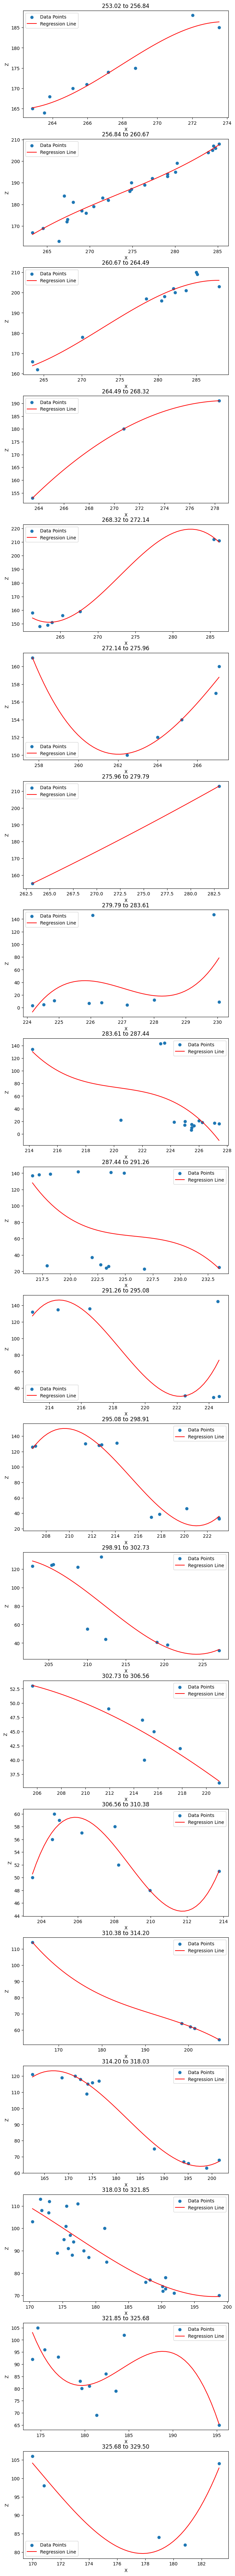

In [52]:
points = data[:, :3]
X = points[:, 0]
Y = points[:, 1]
Z = points[:, 2]

y_min = np.min(Y)
y_max = np.max(Y)
num_segments = 20
y_segments = np.linspace(y_min, y_max, num_segments + 1)

degree = 3
model = LinearRegression()

fig, axes = plt.subplots(num_segments, 1, figsize=(8, 5 * num_segments))

for i in range(num_segments):
    mask = (Y >= y_segments[i]) & (Y < y_segments[i+1])
    x_values = X[mask]
    z_values = Z[mask]

    ax = axes[i] if num_segments > 1 else axes
    ax.scatter(x_values, z_values, label='Data Points')
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_title(f'{y_segments[i]:.2f} to {y_segments[i+1]:.2f}')
    ax.legend()

    # 多项式特征扩展
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x_values.reshape(-1, 1))

    # 拟合多项式回归模型
    model.fit(x_poly, z_values)

    # 提取回归方程式的系数和截距
    coef = model.coef_[1:]  # 去除常数项的系数
    intercept = model.intercept_

    # 构建回归方程式
    equation = f"Z = {intercept:.2f}"
    for j in range(degree):
        equation += f" + {coef[j]:.2f} * X^{j+1}"
    print(equation)

    # 绘制回归线
    x_range = np.linspace(np.min(x_values), np.max(x_values))
    x_range_poly = poly_features.transform(x_range.reshape(-1, 1))
    z_range = model.predict(x_range_poly)
    ax.plot(x_range, z_range, color='red', label='Regression Line')
    ax.legend()

    point_cloud = np.column_stack((x_values, y_segments[i] * np.ones_like(x_values), z_values))
    line_cloud = np.column_stack((x_range, y_segments[i] * np.ones_like(x_range), z_range))

    pcd_points = o3d.geometry.PointCloud()
    pcd_points.points = o3d.utility.Vector3dVector(point_cloud)

    pcd_line = o3d.geometry.PointCloud()
    pcd_line.points = o3d.utility.Vector3dVector(line_cloud)

    # o3d.io.write_point_cloud(f'output_line_{i}.ply', pcd_line)